In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import simtk.openmm as mm
from torsionfit import TorsionScanSet as ScanSet
import torsionfit.TorsionFitModel as Model
from torsionfit import sqlite_plus
from pymc import MCMC
from parmed.charmm import CharmmParameterSet
from torsionfit import plots

In [8]:
param = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')
structure = '../structure/butane.psf'
scan = ['HF/butane_scan_180_pos.log']
scan_2 = ['DFT_b3lyp/butane_scan_b3lyp_360.log']

scan_HF = ScanSet.parse_psi4(scan, structure)
scan_DFT = ScanSet.parse_psi4(scan_2, structure)
scan_HF.compute_energy(param)
scan_DFT.compute_energy(param)

In [53]:
# Turn off everything besides nonbonded
param_2 = CharmmParameterSet('../../data/charmm_ff/top_all36_cgenff.rtf', '../../data/charmm_ff/par_all36_cgenff.prm')

param_2.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_2.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_2.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_2.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_2.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_2.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_2.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_2.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_2.bond_types[('CG331', 'CG321')].k=0
param_2.bond_types[('CG321', 'CG321')].k=0
param_2.bond_types[('CG331', 'HGA3')].k=0
param_2.bond_types[('CG321', 'HGA2')].k=0
param_2.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_2.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_2.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_2.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_2.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_2.angle_types[('HGA2', 'CG321', 'CG321')].k=0

scan_nb = ScanSet.parse_psi4(scan, structure)
scan_nb.compute_energy(param_2)

scan_nb_DFT = ScanSet.parse_psi4(scan_2, structure)
scan_nb_DFT.compute_energy(param_2)

In [54]:
# Turn off everything besides bonds

param_3 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')
structure_no_charge = '../structure/butane_charge_off.psf'

param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_3.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_3.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_3.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_3.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_3.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_3.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0

param_3.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_3.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_3.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_3.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_3.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_3.angle_types[('HGA2', 'CG321', 'CG321')].k=0

scan_bonds = ScanSet.parse_psi4(scan, structure_no_charge)
scan_bonds.compute_energy(param_3)

scan_bonds_DFT = ScanSet.parse_psi4(scan_2, structure_no_charge)
scan_bonds_DFT.compute_energy(param_3)

In [55]:
# Turn off everything besides angles

param_4 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][1].phi_k=0
param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'CG331')][0].phi_k=0
param_4.dihedral_types[('HGA3', 'CG331', 'CG321', 'HGA2')][0].phi_k=0
param_4.dihedral_types[('HGA2', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_4.dihedral_types[('HGA3', 'CG331', 'CG321', 'CG321')][0].phi_k=0
param_4.dihedral_types[('CG321', 'CG321', 'CG331', 'HGA3')][0].phi_k=0
param_4.dihedral_types[('HGA2', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_4.dihedral_types[('CG331', 'CG321', 'CG321', 'HGA2')][0].phi_k=0
param_4.bond_types[('CG331', 'CG321')].k=0
param_4.bond_types[('CG321', 'CG321')].k=0
param_4.bond_types[('CG331', 'HGA3')].k=0
param_4.bond_types[('CG321', 'HGA2')].k=0

scan_angles = ScanSet.parse_psi4(scan, structure_no_charge)
scan_angles.compute_energy(param_4)

scan_angles_DFT = ScanSet.parse_psi4(scan_2, structure_no_charge)
scan_angles_DFT.compute_energy(param_4)

In [56]:
# Turn off everything besides dihedrals

param_5 = CharmmParameterSet('../param/par_all36_cgenff.prm', '../param/top_all36_cgenff.rtf')

param_5.bond_types[('CG331', 'CG321')].k=0
param_5.bond_types[('CG321', 'CG321')].k=0
param_5.bond_types[('CG331', 'HGA3')].k=0
param_5.bond_types[('CG321', 'HGA2')].k=0
param_5.angle_types[('CG331', 'CG321', 'CG321')].k=0
param_5.angle_types[('HGA3', 'CG331', 'CG321')].k=0
param_5.angle_types[('HGA2', 'CG321', 'HGA2')].k=0
param_5.angle_types[('CG331', 'CG321', 'HGA2')].k=0
param_5.angle_types[('HGA3', 'CG331', 'HGA3')].k=0
param_5.angle_types[('HGA2', 'CG321', 'CG321')].k=0

scan_dih = ScanSet.parse_psi4(scan, structure_no_charge)
scan_dih.compute_energy(param_5)

scan_dih_DFT = ScanSet.parse_psi4(scan_2, structure_no_charge)
scan_dih_DFT.compute_energy(param_5)

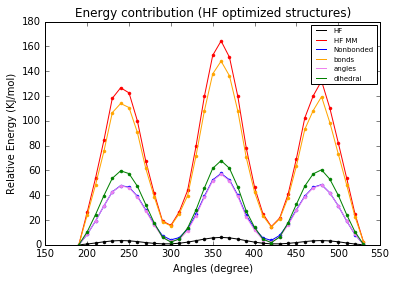

In [59]:
plt.plot(scan_HF.steps, scan_HF.qm_energy, color='black', label='HF')
plt.plot(scan_HF.steps, scan_HF.qm_energy, '.', color='black')
plt.plot(scan_HF.steps, scan_HF.mm_energy, color='red', label='HF MM')
plt.plot(scan_HF.steps, scan_HF.mm_energy,'.', color='red')
plt.plot(scan_nb.steps, scan_nb.mm_energy, color='blue', label='Nonbonded')
plt.plot(scan_nb.steps, scan_nb.mm_energy, '.', color='blue')
plt.plot(scan_bonds.steps, scan_bonds.mm_energy, color='orange', label='bonds')
plt.plot(scan_bonds.steps, scan_bonds.mm_energy, '.', color='orange')
plt.plot(scan_angles.steps, scan_angles.mm_energy, color='violet', label='angles')
plt.plot(scan_angles.steps, scan_angles.mm_energy, '.', color='violet')
plt.plot(scan_dih.steps, scan_dih.mm_energy, color='green', label='dihedral')
plt.plot(scan_dih.steps, scan_dih.mm_energy, '.', color='green')
plt.legend(prop={'size':7})
plt.title('Energy contribution (HF optimized structures)')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Butane_scan_energy_cont_HF.pdf')

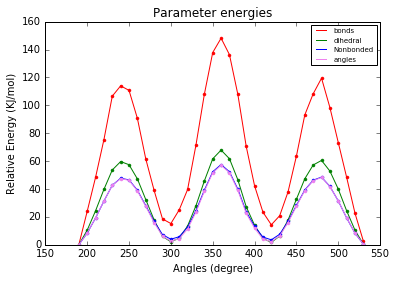

In [52]:
plt.plot(scan_bonds.steps, scan_bonds.mm_energy, color='red', label='bonds')
plt.plot(scan_bonds.steps, scan_bonds.mm_energy, '.', color='red')
plt.plot(scan_dih.steps, scan_dih.mm_energy, color='green', label='dihedral')
plt.plot(scan_dih.steps, scan_dih.mm_energy, '.', color='green')
plt.plot(scan_nb.steps, scan_nb.mm_energy, color='blue', label='Nonbonded')
plt.plot(scan_nb.steps, scan_nb.mm_energy, '.', color='blue')
plt.plot(scan_angles.steps, scan_angles.mm_energy, color='violet', label='angles')
plt.plot(scan_angles.steps, scan_angles.mm_energy, '.', color='violet')

plt.legend(prop={'size':7})
plt.title('Parameter energies')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Butane_scan_param_energies.pdf')

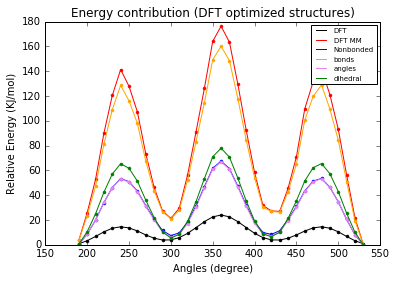

In [61]:
plt.plot(scan_DFT.steps, scan_DFT.qm_energy, color='black', label='DFT')
plt.plot(scan_DFT.steps, scan_DFT.qm_energy, '.', color='black')
plt.plot(scan_DFT.steps, scan_DFT.mm_energy, color='red', label='DFT MM')
plt.plot(scan_DFT.steps, scan_DFT.mm_energy,'.', color='red')
plt.plot(scan_nb_DFT.steps, scan_nb_DFT.mm_energy, color='blue', label='Nonbonded')
plt.plot(scan_nb_DFT.steps, scan_nb_DFT.mm_energy, '.', color='blue')
plt.plot(scan_bonds_DFT.steps, scan_bonds_DFT.mm_energy, color='orange', label='bonds')
plt.plot(scan_bonds_DFT.steps, scan_bonds_DFT.mm_energy, '.', color='orange')
plt.plot(scan_angles_DFT.steps, scan_angles_DFT.mm_energy, color='violet', label='angles')
plt.plot(scan_angles_DFT.steps, scan_angles_DFT.mm_energy, '.', color='violet')
plt.plot(scan_dih_DFT.steps, scan_dih_DFT.mm_energy, color='green', label='dihedral')
plt.plot(scan_dih_DFT.steps, scan_dih_DFT.mm_energy, '.', color='green')
plt.legend(prop={'size':7})
plt.title('Energy contribution (DFT optimized structures)')
plt.xlabel('Angles (degree)')
plt.ylabel('Relative Energy (KJ/mol)')
plt.savefig('Butane_scan_energy_cont_DFT.pdf')

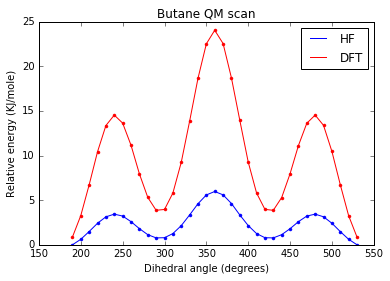

In [70]:
plt.plot(scan_HF.steps, scan_HF.qm_energy,'.', color='blue')
plt.plot(scan_HF.steps, scan_HF.qm_energy, color='blue', label='HF')
plt.plot(scan_DFT.steps, scan_DFT.qm_energy,'.', color='red')
plt.plot(scan_DFT.steps, scan_DFT.qm_energy, color='red', label='DFT')
plt.legend()
plt.xlabel('Dihedral angle (degrees)')
plt.ylabel('Relative energy (KJ/mole)')
plt.title('Butane QM scan')
plt.savefig('Butane_HF_DFT_scan.pdf')